## This notebook shows how to use Orchestrator APIs for user experiments

In [1]:
import os
from fabric_cm.credmgr.credmgr_proxy import CredmgrProxy
from fabric_cf.orchestrator.orchestrator_proxy import OrchestratorProxy
import json

In [2]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
credmgr_proxy = CredmgrProxy(credmgr_host=credmgr_host)
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
orchestrator_proxy = OrchestratorProxy(orchestrator_host=orchestrator_host)

In [3]:
not_found=False
fabric_refresh_token=None
%store -r fabric_refresh_token

if fabric_refresh_token is None:
    fabric_refresh_token=os.environ['CILOGON_REFRESH_TOKEN']
    %store fabric_refresh_token
print("Fabric Refresh Token {}".format(fabric_refresh_token))
print("CILOGON_REFRESH_TOKEN environment variable: {}".format(os.environ['CILOGON_REFRESH_TOKEN']))

no stored variable or alias fabric_refresh_token
Stored 'fabric_refresh_token' (str)
Fabric Refresh Token https://cilogon.org/oauth2/refreshToken/7a9369e8aa40dc992066859862468b25/1617408843969
CILOGON_REFRESH_TOKEN environment variable: https://cilogon.org/oauth2/refreshToken/7a9369e8aa40dc992066859862468b25/1617408843969


In [4]:
try:
    refresh_res = credmgr_proxy.refresh(project_name='all', scope='all', refresh_token=fabric_refresh_token)
    print("New Tokens received: {}".format(json.dumps(refresh_res)))
    fabric_id_token=refresh_res['id_token']
    fabric_refresh_token=refresh_res['refresh_token']
    print()
    print("New Refresh Token: {}".format(fabric_refresh_token))
    print()
    print("Stored new Refresh Token")
    %store fabric_refresh_token
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

New Tokens received: {"id_token": "eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6Im1pbmF3bUBidS5lZHUiLCJjZXJ0X3N1YmplY3RfZG4iOiIvREM9b3JnL0RDPWNpbG9nb24vQz1VUy9PPUJvc3RvbiBVbml2ZXJzaXR5L0NOPU1pbmEgV2lsbGlhbSBNb3Jjb3MgQjQxMzUwNzg3IiwiaWRwIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCIsImlkcF9uYW1lIjoiQm9zdG9uIFVuaXZlcnNpdHkiLCJlcHBuIjoibWluYXdtQGJ1LmVkdSIsImVwdGlkIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCFodHRwczovL2NpbG9nb24ub3JnL3NoaWJib2xldGghUmZSTTBqUWdkYWJHbWFNZmRkRUVZZVlHRTJzPSIsImFmZmlsaWF0aW9uIjoic3R1ZGVudEBidS5lZHU7bWVtYmVyQGJ1LmVkdSIsIm5hbWUiOiJNaW5hIFdpbGxpYW0gTW9yY29zIiwiYWNyIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9zaW5nbGUiLCJlbnRpdGxlbWVudCI6Imh0dHA6Ly9pYW0uYnUuZWR1L2lkaW5mby84MDtodHRwOi8vaWFtLmJ1LmVkdS9tZW1iZXIvY2FzO2h0dHA6Ly9pYW0uYnUuZWR1L3JlZy9jb2xsZWdlL2dycztodHRwOi8vaWFtLmJ1LmVkdS9yZWcvY29sbGVnZS9jYXMiLCJpc3MiOiJodHRwczovL2NpbG9nb24ub3JnIiwic3ViIjoiaHR0cDovL2NpbG9nb2

### Query for available resources

In [5]:
status, advertised_topology = orchestrator_proxy.resources(token=fabric_id_token)

print(f"Status: {status}")
print(f"Toplogy: {advertised_topology}")

Status: Status.OK
Toplogy: LBNL: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 3/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2, }
	Site Interfaces:
RENC: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 1/2, }
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
	Site Interfaces:
UKY: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Co

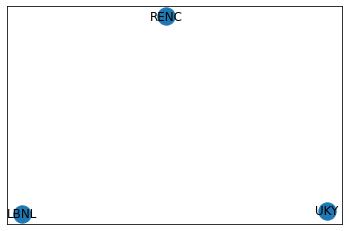

In [6]:
advertised_topology.draw()

## Create Slice

In [7]:
import fim.user as fu
# Create topology
t = fu.ExperimentTopology()

# Add node
n1 = t.add_node(name='n1', site='RENC')

# Set capacities
cap = fu.Capacities()
cap.set_fields(core=4, ram=64, disk=500)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_ubuntu_20')

# Add PCI devices
n1.add_component(ctype=fu.ComponentType.SmartNIC, model='ConnectX-5', name='nic1')

# # Add node
# n2 = t.add_node(name='n2', site='UKY')

# # Set properties
# n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# # Add PCI devices
# n2.add_component(ctype=fu.ComponentType.GPU, model='Tesla T4', name='nic2')

# # Add node
# n3 = t.add_node(name='n3', site='LBNL')

# # Set properties
# n3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# # Add PCI devices
# n3.add_component(ctype=fu.ComponentType.GPU, model='Tesla T4', name='nic3')

# Generate Slice Graph
slice_graph = t.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = orchestrator_proxy.create(token=fabric_id_token, slice_name='JupyterSlice2', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
print("Reservations created {}".format(reservations))

Response Status Status.OK
Reservations created [{
    "graph_node_id": "ba0b822b-0e5a-4a9d-9826-8b989fd865aa",
    "join_state": "None_",
    "lease_end": "2021-04-04 00:23:33",
    "reservation_id": "a9b8b657-9af6-4c2b-9636-61f053bd0429",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "292cd925-4d95-41cd-90ca-c165e976473b"
}]


In [8]:
# Set the Slice ID from output of the above command
slice_id=reservations[0].slice_id

## Query Slices

In [9]:
status, slices = orchestrator_proxy.slices(token=fabric_id_token)

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.OK
Slices [{
    "graph_id": "5943902f-f6f9-4dc9-8b78-2b0fea56e151",
    "slice_id": "292cd925-4d95-41cd-90ca-c165e976473b",
    "slice_name": "JupyterSlice2",
    "slice_state": "StableOK"
}]


## Query Slice

In [10]:
status, slice_obj = orchestrator_proxy.get_slice(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(slice_obj))

Response Status Status.OK
Response received n1[VM]: { core: 4, ram: 64G, disk: 500G, }
Links:


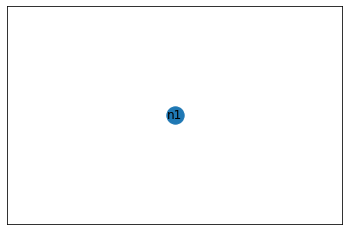

In [11]:
slice_obj.draw()

## Query Slivers

In [12]:
status, reservations = orchestrator_proxy.slivers(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Reservations {}".format(reservations))

Response Status Status.OK
Reservations [{
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "ba0b822b-0e5a-4a9d-9826-8b989fd865aa",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-04 00:23:33",
    "management_ip": "152.54.15.46",
    "name": "n1",
    "reservation_id": "a9b8b657-9af6-4c2b-9636-61f053bd0429",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "292cd925-4d95-41cd-90ca-c165e976473b"
}]


In [13]:
# Set the Sliver ID from output of the above command by capturing reservation_id
sliver_id=reservations[0].reservation_id

## Query Sliver

In [14]:
status, reservation = orchestrator_proxy.slivers(token=fabric_id_token, slice_id=slice_id, sliver_id=sliver_id)

print("Response Status {}".format(status))
print("Reservation {}".format(reservation))

Response Status Status.OK
Reservation [{
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "ba0b822b-0e5a-4a9d-9826-8b989fd865aa",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-04 00:23:33",
    "management_ip": "152.54.15.46",
    "name": "n1",
    "reservation_id": "a9b8b657-9af6-4c2b-9636-61f053bd0429",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "292cd925-4d95-41cd-90ca-c165e976473b"
}]


## Slice Status

In [15]:
status, slice_status = orchestrator_proxy.slice_status(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Slice Status {}".format(slice_status))

Response Status Status.OK
Slice Status {
    "graph_id": "5943902f-f6f9-4dc9-8b78-2b0fea56e151",
    "slice_id": "292cd925-4d95-41cd-90ca-c165e976473b",
    "slice_name": "JupyterSlice2",
    "slice_state": "StableOK"
}


## Sliver Status

In [16]:
status, reservation_status = orchestrator_proxy.sliver_status(token=fabric_id_token, slice_id=slice_id, sliver_id=sliver_id)

print("Response Status {}".format(status))
print("Reservation Status {}".format(reservation_status))

Response Status Status.OK
Reservation Status {
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "ba0b822b-0e5a-4a9d-9826-8b989fd865aa",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-04 00:23:33",
    "management_ip": "152.54.15.46",
    "name": "n1",
    "notices": "Reservation a9b8b657-9af6-4c2b-9636-61f053bd0429 (Slice JupyterSlice2(292cd925-4d95-41cd-90ca-c165e976473b) Graph Id:5943902f-f6f9-4dc9-8b78-2b0fea56e151 ) is in state [Active,None_]\n\nLast ticket update: \nTicket events: \nLast ticket update: \nTicket events: ",
    "reservation_id": "a9b8b657-9af6-4c2b-9636-61f053bd0429",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "292cd925-4d95-41cd-90ca-c165e976473b"
}


In [17]:
import paramiko

In [18]:
key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client = paramiko.SSHClient()
client.load_system_host_keys()
client.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect("152.54.15.46",username='ubuntu',pkey = key)

client
# stdin, stdout, stderr = client.exec_command('echo \"' + script + '\" > script.sh; chmod +x script.sh; sudo ./script.sh')


# Working on the reserved machine starts here

## First, some few test commands.

In [21]:
stdin, stdout, stderr = client.exec_command('lsb_release -a')
print (stdout.read())
print (stderr.read())

b'Distributor ID:\tUbuntu\nDescription:\tUbuntu 20.04.2 LTS\nRelease:\t20.04\nCodename:\tfocal\n'
b'No LSB modules are available.\n'


In [22]:
stdin, stdout, stderr = client.exec_command('uname -r')
print (stdout.read())
print (stderr.read())

b'5.4.0-70-generic\n'
b''


In [26]:
stdin, stdout, stderr = client.exec_command('lsb_release -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.2 LTS
Release:	20.04
Codename:	focal

No LSB modules are available.



## We're going to set up an HTTP server. So we need to install apache2.

In [27]:
stdin, stdout, stderr = client.exec_command('sudo apt -y install apache2')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  apache2-bin apache2-data apache2-utils libapr1 libaprutil1
  libaprutil1-dbd-sqlite3 libaprutil1-ldap libjansson4 liblua5.2-0 ssl-cert
Suggested packages:
  apache2-doc apache2-suexec-pristine | apache2-suexec-custom www-browser
  openssl-blacklist
The following NEW packages will be installed:
  apache2 apache2-bin apache2-data apache2-utils libapr1 libaprutil1
  libaprutil1-dbd-sqlite3 libaprutil1-ldap libjansson4 liblua5.2-0 ssl-cert
0 upgraded, 11 newly installed, 0 to remove and 0 not upgraded.
Need to get 1865 kB of archives.
After this operation, 8080 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 libapr1 amd64 1.6.5-1ubuntu1 [91.4 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 libaprutil1 amd64 1.6.1-4ubuntu2 [84.7 kB]
Get:3 http://nova.clouds.archive.ubuntu

## Here I try to install "imgkit" on the notebook itself, but I'm getting an error. In the end, I decided not to use it anyway.

In [29]:
!pip install imgkit

  Created wheel for imgkit: filename=imgkit-1.1.0-py3-none-any.whl size=6798 sha256=38fb01f80c9ff34146d13ce8ee9a3c303da553bf05de1629643180fdbe047aae
  Stored in directory: /home/fabric/.cache/pip/wheels/1d/5d/8c/7884b710409af91b016c010839b43d8eec7331bf2ec3f5d495
Successfully built imgkit
ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/opt/conda/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info

## Let's look at the default file that apache2 hosts.

In [35]:
stdin, stdout, stderr = client.exec_command('cat /var/www/html/index.html')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
  <!--
    Modified from the Debian original for Ubuntu
    Last updated: 2016-11-16
    See: https://launchpad.net/bugs/1288690
  -->
  <head>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    <title>Apache2 Ubuntu Default Page: It works</title>
    <style type="text/css" media="screen">
  * {
    margin: 0px 0px 0px 0px;
    padding: 0px 0px 0px 0px;
  }

  body, html {
    padding: 3px 3px 3px 3px;

    background-color: #D8DBE2;

    font-family: Verdana, sans-serif;
    font-size: 11pt;
    text-align: center;
  }

  div.main_page {
    position: relative;
    display: table;

    width: 800px;

    margin-bottom: 3px;
    margin-left: auto;
    margin-right: auto;
    padding: 0px 0px 0px 0px;

    border-width: 2px;
    border-color: #212738;
    border-style: solid;

    background-colo

## It's a nice long file, but let's delete it so that we host something that we want.

In [36]:
stdin, stdout, stderr = client.exec_command('rm /var/www/html/index.html')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))


rm: cannot remove '/var/www/html/index.html': Permission denied



In [37]:
stdin, stdout, stderr = client.exec_command('sudo rm /var/www/html/index.html')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

## Now we create the new file that we want to host.

In [38]:
stdin, stdout, stderr = client.exec_command('echo "This is my custom file that I want to host." > /var/www/html/index.html')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))


bash: /var/www/html/index.html: Permission denied



In [40]:
stdin, stdout, stderr = client.exec_command('echo "This is some text that I want to host." | sudo tee -a /var/www/html/index.html')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

This is some text that I want to host.




## We're done. Let's check that the file is there one more time.

In [41]:
stdin, stdout, stderr = client.exec_command('cat /var/www/html/index.html')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

This is some text that I want to host.




## Now we act as clients and request the the file with a get request.

In [43]:
import requests

x = requests.get('http://152.54.15.46')
print(x.status_code)
print(x.content)

200
b'This is some text that I want to host.\n'


## So happy that this worked so quickly :D I thought I'm gonna face issues like, maybe, NATing issues. Happy it worked :D

## Let's try something else. We're going to install an echo server and talk to it.

In [45]:
stdin, stdout, stderr = client.exec_command('sudo apt update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [109 kB]
Get:2 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [575 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [120 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [7436 B]
Get:5 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [148 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [21.6 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [550 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [81.2 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [10.7 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [14.8 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [3160 B]
Get:12 http://security.ubuntu.co

In [47]:
stdin, stdout, stderr = client.exec_command('sudo apt -y install ncat')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  liblua5.3-0
The following NEW packages will be installed:
  liblua5.3-0 ncat
0 upgraded, 2 newly installed, 0 to remove and 8 not upgraded.
Need to get 223 kB of archives.
After this operation, 778 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 liblua5.3-0 amd64 5.3.3-1.1ubuntu2 [116 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 ncat amd64 7.80+dfsg1-2build1 [107 kB]
Fetched 223 kB in 0s (601 kB/s)
Selecting previously unselected package liblua5.3-0:amd64.
(Reading database ... 64166 files and directories currently installed.)
Preparing to unpack .../liblua5.3-0_5.3.3-1.1ubuntu2_amd64.deb ...
Unpacking liblua5.3-0:amd64 (5.3.3-1.1ubuntu2) ...
Selecting previously unselected package ncat.
Preparing to unpack .../ncat_7.80+dfsg1-2build1_amd64.deb ...
Unpacking n

## This line runs a netcat echo server on port 5555.

In [76]:
stdin, stdout, stderr = client.exec_command("ncat -v -l -p 5555 -c 'while true; do read i && echo [echo] $i; done' > /dev/null 2>&1 &")
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

## Now again, we act as clients and connect to the netcat echo server. We speak some lines and hear the echoes.

In [77]:
import telnetlib

HOST = "152.54.15.46"

tn = telnetlib.Telnet(HOST, 5555)

tn.write(b"hello\n")
print(tn.read_until(b"hello").decode("utf-8"))
tn.write(b"are you echoing?\n")
print(tn.read_until(b"echoing?").decode("utf-8"))
tn.close()

[echo] hello

[echo] are you echoing?


## It's working :D That means that all the ports are publicly reachable I believe.

## Delete Slice

In [78]:
status, result = orchestrator_proxy.delete(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.FAILURE
Response received (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Sat, 03 Apr 2021 03:04:16 GMT', 'Content-Type': 'application/json', 'Content-Length': '56', 'Connection': 'keep-alive'})
HTTP response body: "Slice# 292cd925-4d95-41cd-90ca-c165e976473b not found"




Hmmmm I can't delete the slice.

In [79]:
status, slice_obj = orchestrator_proxy.get_slice(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(slice_obj))

Response Status Status.FAILURE
Response received (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Sat, 03 Apr 2021 03:05:21 GMT', 'Content-Type': 'application/json', 'Content-Length': '22', 'Connection': 'keep-alive'})
HTTP response body: "User# has no Slices"




In [80]:
status, slices = orchestrator_proxy.slices(token=fabric_id_token)

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.FAILURE
Slices (500)
Reason: INTERNAL SERVER ERROR
HTTP response headers: HTTPHeaderDict({'Server': 'nginx/1.19.8', 'Date': 'Sat, 03 Apr 2021 03:06:11 GMT', 'Content-Type': 'application/json', 'Content-Length': '22', 'Connection': 'keep-alive'})
HTTP response body: "User# has no Slices"




In [81]:
try:
    refresh_res = credmgr_proxy.refresh(project_name='all', scope='all', refresh_token=fabric_refresh_token)
    print("New Tokens received: {}".format(json.dumps(refresh_res)))
    fabric_id_token=refresh_res['id_token']
    fabric_refresh_token=refresh_res['refresh_token']
    print()
    print("New Refresh Token: {}".format(fabric_refresh_token))
    print()
    print("Stored new Refresh Token")
    %store fabric_refresh_token
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

New Tokens received: {"id_token": "eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6Im1pbmF3bUBidS5lZHUiLCJjZXJ0X3N1YmplY3RfZG4iOiIvREM9b3JnL0RDPWNpbG9nb24vQz1VUy9PPUJvc3RvbiBVbml2ZXJzaXR5L0NOPU1pbmEgV2lsbGlhbSBNb3Jjb3MgQjQxMzUwNzg3IiwiaWRwIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCIsImlkcF9uYW1lIjoiQm9zdG9uIFVuaXZlcnNpdHkiLCJlcHBuIjoibWluYXdtQGJ1LmVkdSIsImVwdGlkIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCFodHRwczovL2NpbG9nb24ub3JnL3NoaWJib2xldGghUmZSTTBqUWdkYWJHbWFNZmRkRUVZZVlHRTJzPSIsImFmZmlsaWF0aW9uIjoic3R1ZGVudEBidS5lZHU7bWVtYmVyQGJ1LmVkdSIsIm5hbWUiOiJNaW5hIFdpbGxpYW0gTW9yY29zIiwiYWNyIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9zaW5nbGUiLCJlbnRpdGxlbWVudCI6Imh0dHA6Ly9pYW0uYnUuZWR1L2lkaW5mby84MDtodHRwOi8vaWFtLmJ1LmVkdS9tZW1iZXIvY2FzO2h0dHA6Ly9pYW0uYnUuZWR1L3JlZy9jb2xsZWdlL2dycztodHRwOi8vaWFtLmJ1LmVkdS9yZWcvY29sbGVnZS9jYXMiLCJpc3MiOiJodHRwczovL2NpbG9nb24ub3JnIiwic3ViIjoiaHR0cDovL2NpbG9nb2

In [82]:
status, slices = orchestrator_proxy.slices(token=fabric_id_token)

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.OK
Slices [{
    "graph_id": "5943902f-f6f9-4dc9-8b78-2b0fea56e151",
    "slice_id": "292cd925-4d95-41cd-90ca-c165e976473b",
    "slice_name": "JupyterSlice2",
    "slice_state": "StableOK"
}]


In [83]:
status, result = orchestrator_proxy.delete(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.OK
Response received {'value': None}


In [84]:
status, slices = orchestrator_proxy.slices(token=fabric_id_token)

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.OK
Slices []
